In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Final Data set without pivot 1.csv')

In [3]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   fipsStateCode             2282 non-null   int64 
 1   fipsCountyCode            2282 non-null   int64 
 2   Year                      2282 non-null   int64 
 3   Year1                     2282 non-null   int64 
 4   incidentType              2282 non-null   object
 5   Count                     2282 non-null   int64 
 6   NAICS code                2282 non-null   int64 
 7   Meaning of NAICS code     2282 non-null   object
 8   Number of firms           2282 non-null   object
 9   Number of establishments  2282 non-null   object
 10  State                     2282 non-null   object
 11  County Name               2282 non-null   object
dtypes: int64(6), object(6)
memory usage: 214.1+ KB


(None,
    fipsStateCode  fipsCountyCode  Year  Year1  incidentType  Count  \
 0              1              25  2020   2022    Biological      2   
 1              1              25  2020   2022     Hurricane      3   
 2              1              55  2018   2022  Severe Storm      1   
 3              1              55  2018   2022  Severe Storm      1   
 4              1              55  2020   2022    Biological      2   
 
    NAICS code Meaning of NAICS code Number of firms Number of establishments  \
 0         622             Hospitals               3                        3   
 1         622             Hospitals               3                        3   
 2         622             Hospitals               4                        4   
 3         622             Hospitals               4                        4   
 4         622             Hospitals               4                        4   
 
      State County Name  
 0  Alabama      Clarke  
 1  Alabama      Clarke  

## What are the unique incident types recorded in the dataset?

In [4]:
print(df["incidentType"].unique())

['Biological' 'Hurricane' 'Severe Storm' 'Flood' 'Fire' 'Tornado'
 'Earthquake' 'Other' 'Tropical Storm' 'Volcanic Eruption' 'Snowstorm'
 'Dam/Levee Break' 'Severe Ice Storm' 'Coastal Storm' 'Winter Storm'
 'Mud/Landslide']


## How many records exist for each incident type?

In [5]:
df["incidentType"].value_counts()

incidentType
Biological           870
Hurricane            533
Severe Storm         237
Fire                 197
Flood                174
Severe Ice Storm     119
Tropical Storm        47
Snowstorm             40
Tornado               22
Earthquake            11
Other                 11
Winter Storm          10
Mud/Landslide          5
Volcanic Eruption      2
Dam/Levee Break        2
Coastal Storm          2
Name: count, dtype: int64

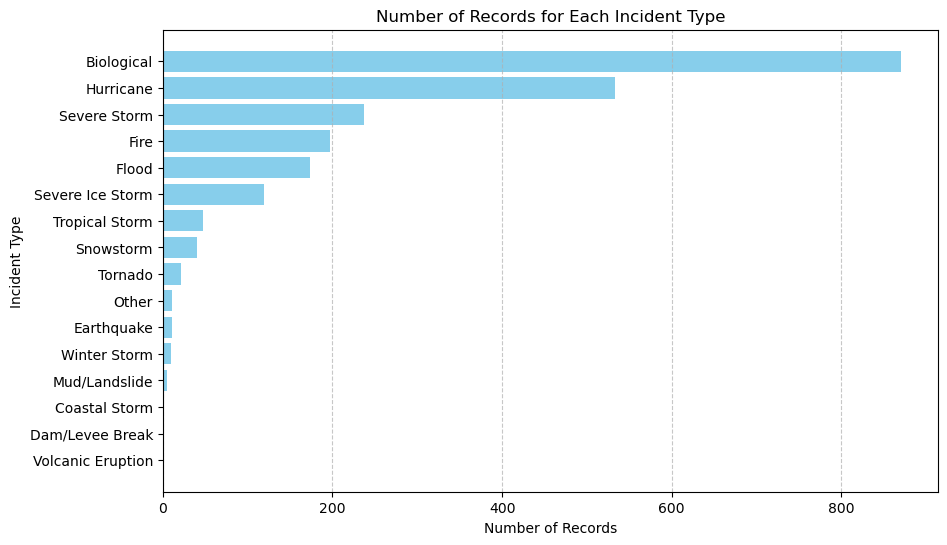

In [6]:
# Re-import necessary libraries since the execution state was reset
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the provided image
incident_data = {
    "Biological": 870,
    "Hurricane": 533,
    "Severe Storm": 237,
    "Fire": 197,
    "Flood": 174,
    "Severe Ice Storm": 119,
    "Tropical Storm": 47,
    "Snowstorm": 40,
    "Tornado": 22,
    "Earthquake": 11,
    "Other": 11,
    "Winter Storm": 10,
    "Mud/Landslide": 5,
    "Volcanic Eruption": 2,
    "Dam/Levee Break": 2,
    "Coastal Storm": 2
}

# Convert to DataFrame
df_incident = pd.DataFrame(list(incident_data.items()), columns=["Incident Type", "Count"])

# Sort data for better visualization
df_incident = df_incident.sort_values(by="Count", ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_incident["Incident Type"], df_incident["Count"], color="skyblue")
plt.xlabel("Number of Records")
plt.ylabel("Incident Type")
plt.title("Number of Records for Each Incident Type")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display the plot
plt.show()


## How many unique states and counties are present?

In [7]:
df["State"].nunique(), df["County Name"].nunique()

(48, 375)

 ## What is the time range of disasters recorded in the dataset?

In [8]:
df["Year"].min(), df["Year"].max()

(2018, 2022)

## Which industries (NAICS codes) are represented?

In [9]:
df["Meaning of NAICS code"].unique()

array(['Hospitals'], dtype=object)

## What are the top 5 counties most frequently affected by disasters?

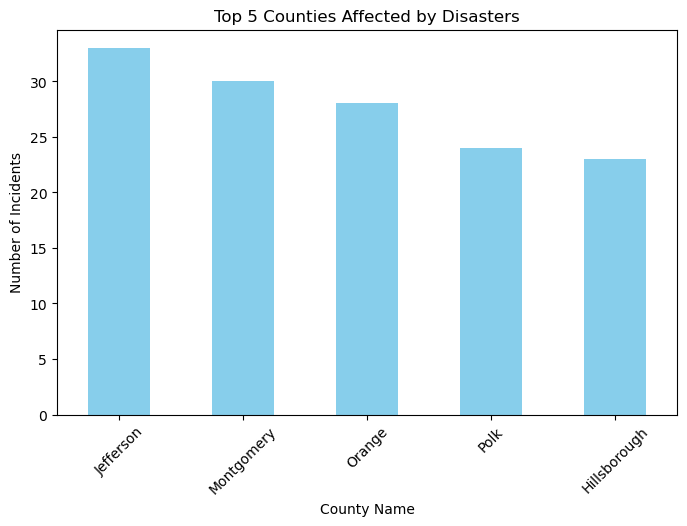

In [10]:
import matplotlib.pyplot as plt

top_counties = df["County Name"].value_counts().head(5)
plt.figure(figsize=(8,5))
top_counties.plot(kind="bar", color="skyblue")
plt.title("Top 5 Counties Affected by Disasters")
plt.xlabel("County Name")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

## How has the frequency of different disasters changed over time?

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

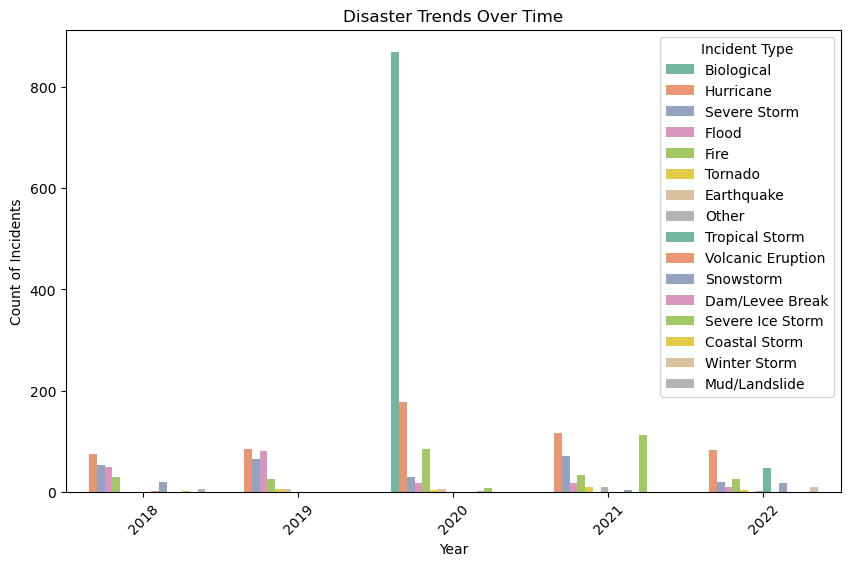

In [11]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Year", hue="incidentType", palette="Set2")
plt.title("Disaster Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Incidents")
plt.legend(title="Incident Type", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

##  Which states experience the highest number of disasters?

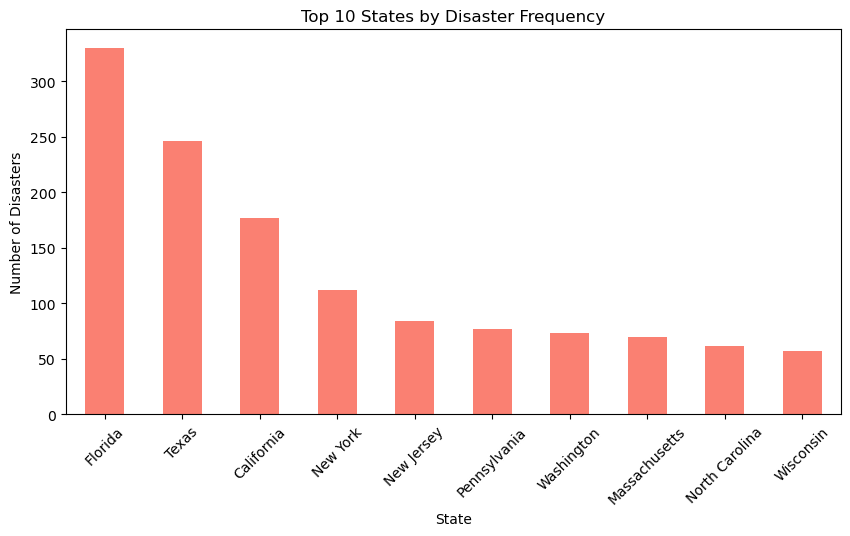

In [12]:
top_states = df["State"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_states.plot(kind="bar", color="salmon")
plt.title("Top 10 States by Disaster Frequency")
plt.xlabel("State")
plt.ylabel("Number of Disasters")
plt.xticks(rotation=45)
plt.show()

## What is the correlation between disaster count and number of firms?

/var/folders/db/jxndjlhs5mv34s2mswgkkf_00000gn/T/ipykernel_28848/3095794806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Number of firms"] = df_filtered["Number of firms"].astype(int)
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

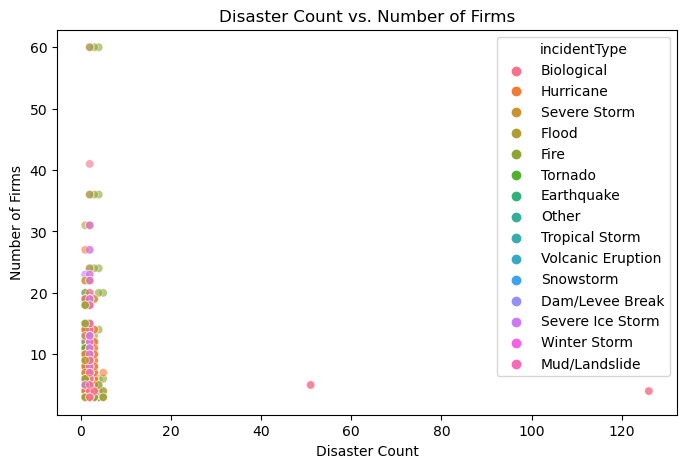

In [13]:
df_filtered = df[df["Number of firms"].apply(lambda x: str(x).isdigit())]
df_filtered["Number of firms"] = df_filtered["Number of firms"].astype(int)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtered, x="Count", y="Number of firms", hue="incidentType", alpha=0.6)
plt.title("Disaster Count vs. Number of Firms")
plt.xlabel("Disaster Count")
plt.ylabel("Number of Firms")
plt.show()

## Which incident type affects the highest number of establishments?

/var/folders/db/jxndjlhs5mv34s2mswgkkf_00000gn/T/ipykernel_28848/1502862768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Number of establishments"] = df_filtered["Number of establishments"].astype(int)
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

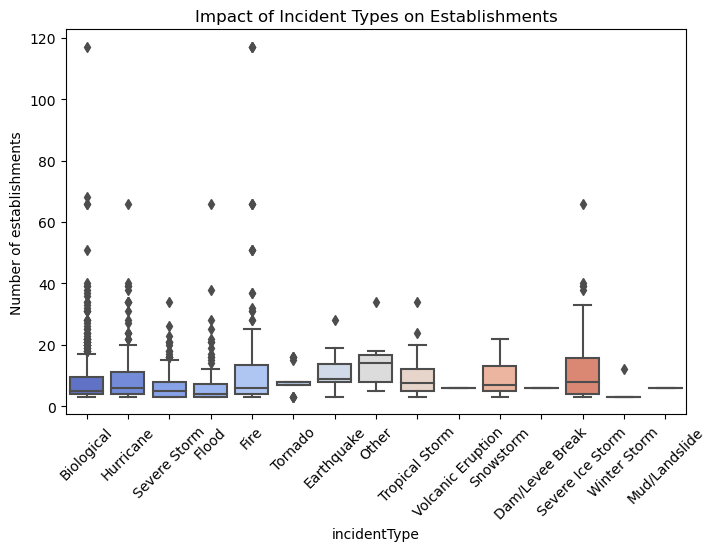

In [14]:
df_filtered = df[df["Number of establishments"].apply(lambda x: str(x).isdigit())]
df_filtered["Number of establishments"] = df_filtered["Number of establishments"].astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x="incidentType", y="Number of establishments", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Impact of Incident Types on Establishments")
plt.show()

## Which states have the highest disaster risk in terms of total incidents?

In [15]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


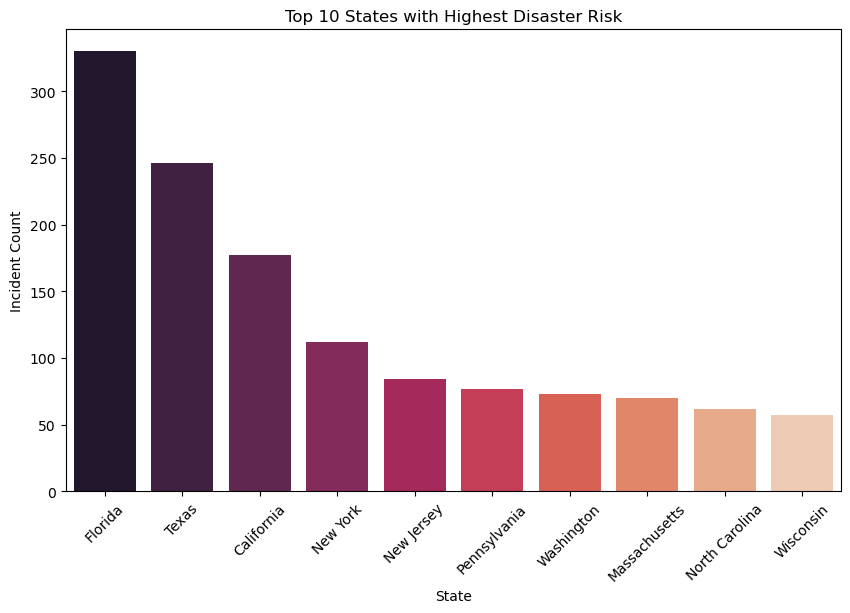

In [16]:
import geopandas as gpd

state_counts = df["State"].value_counts().reset_index()
state_counts.columns = ["State", "Incident Count"]

plt.figure(figsize=(10,6))
sns.barplot(data=state_counts.head(10), x="State", y="Incident Count", palette="rocket")
plt.xticks(rotation=45)
plt.title("Top 10 States with Highest Disaster Risk")
plt.show()

## What is the distribution of disasters across different counties?

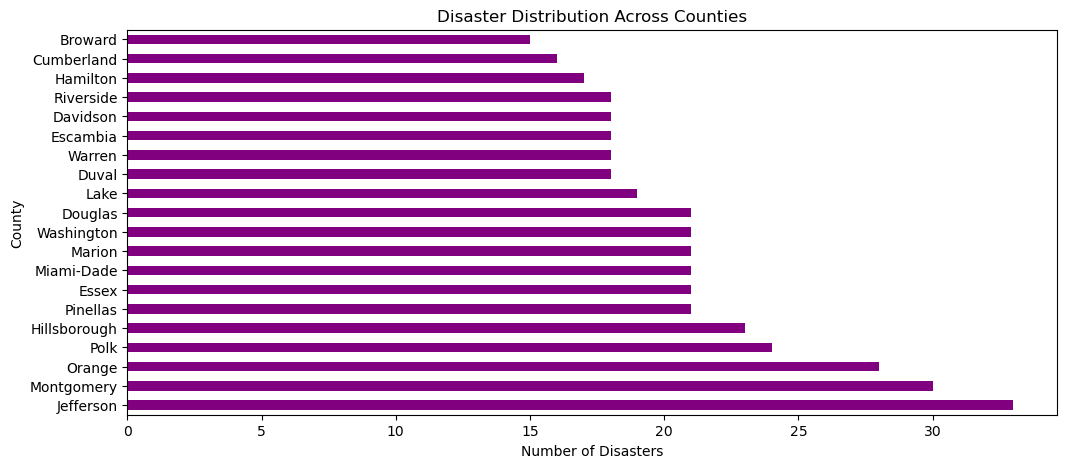

In [17]:
plt.figure(figsize=(12,5))
df["County Name"].value_counts().head(20).plot(kind="barh", color="purple")
plt.title("Disaster Distribution Across Counties")
plt.xlabel("Number of Disasters")
plt.ylabel("County")
plt.show()

## How does disaster frequency correlate with different years?How does disaster frequency correlate with different years?

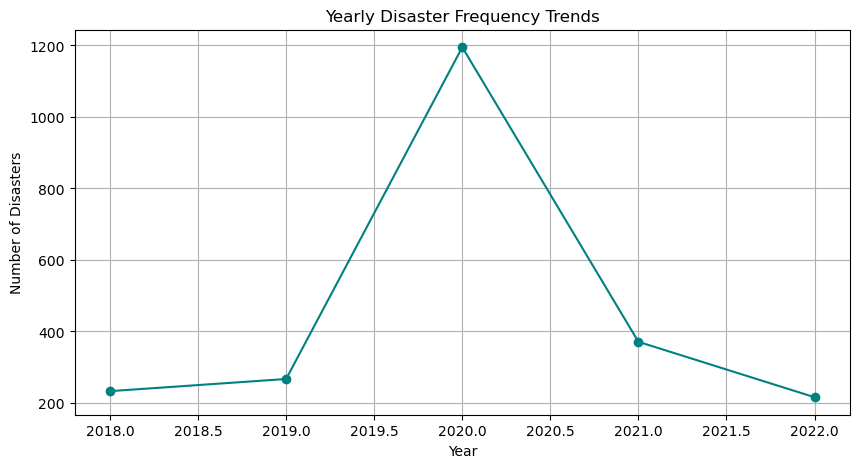

In [18]:
yearly_counts = df.groupby("Year")["incidentType"].count()

plt.figure(figsize=(10,5))
yearly_counts.plot(marker="o", color="teal")
plt.title("Yearly Disaster Frequency Trends")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid()
plt.show()

## How do disasters impact different business sectors over the years?

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

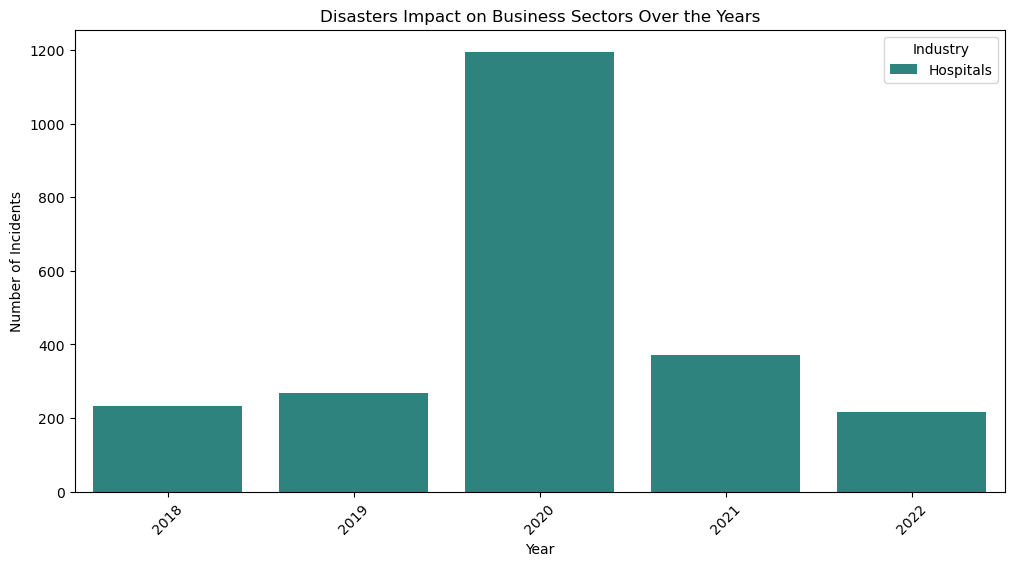

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Year", hue="Meaning of NAICS code", palette="viridis")
plt.title("Disasters Impact on Business Sectors Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Industry", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

## What is the distribution of disaster count across all records?

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


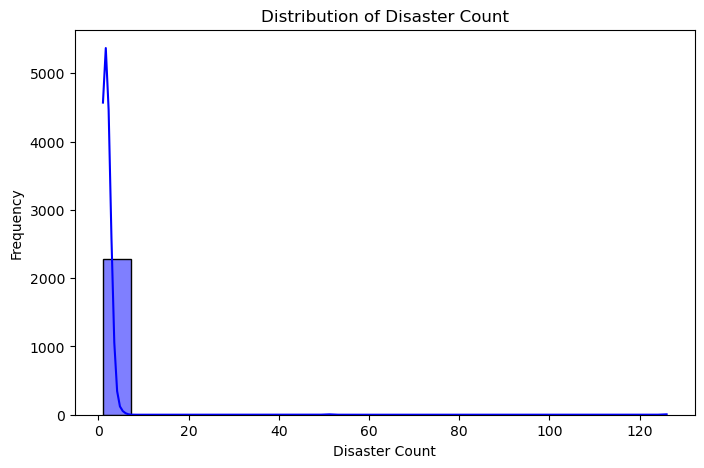

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["Count"], bins=20, kde=True, color="blue")
plt.title("Distribution of Disaster Count")
plt.xlabel("Disaster Count")
plt.ylabel("Frequency")
plt.show()

/var/folders/db/jxndjlhs5mv34s2mswgkkf_00000gn/T/ipykernel_28848/1254675642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Number of establishments"] = df_filtered["Number of establishments"].astype(int)
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


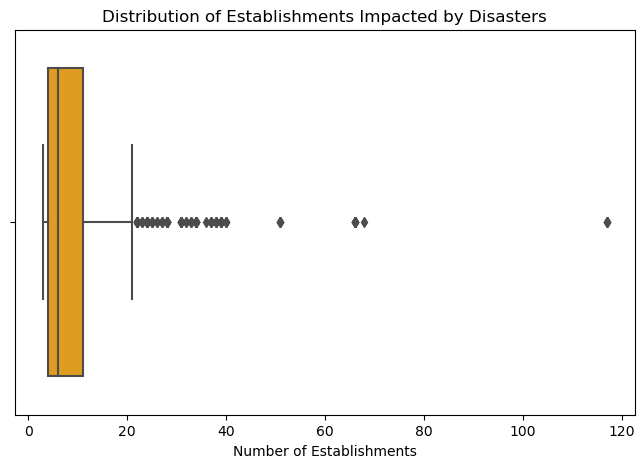

In [21]:
df_filtered = df[df["Number of establishments"].apply(lambda x: str(x).isdigit())]
df_filtered["Number of establishments"] = df_filtered["Number of establishments"].astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(x=df_filtered["Number of establishments"], color="orange")
plt.title("Distribution of Establishments Impacted by Disasters")
plt.xlabel("Number of Establishments")
plt.show()

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


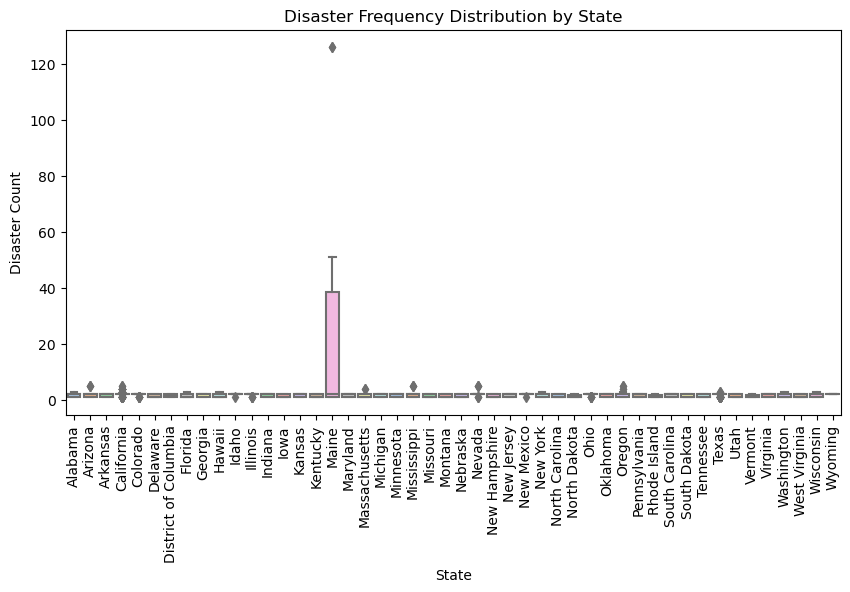

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="State", y="Count", palette="pastel")
plt.xticks(rotation=90)
plt.title("Disaster Frequency Distribution by State")
plt.xlabel("State")
plt.ylabel("Disaster Count")
plt.show()

## What is the distribution of affected counties in each state?

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


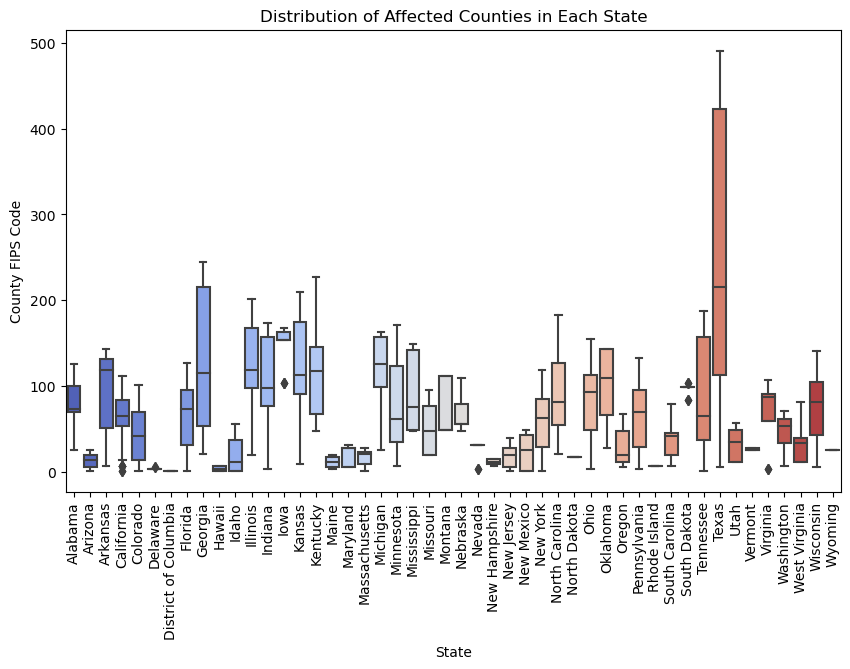

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="State", y="fipsCountyCode", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribution of Affected Counties in Each State")
plt.xlabel("State")
plt.ylabel("County FIPS Code")
plt.show()

In [24]:
pip install mactex

ERROR: Could not find a version that satisfies the requirement mactex (from versions: none)
ERROR: No matching distribution found for mactex
Note: you may need to restart the kernel to use updated packages.


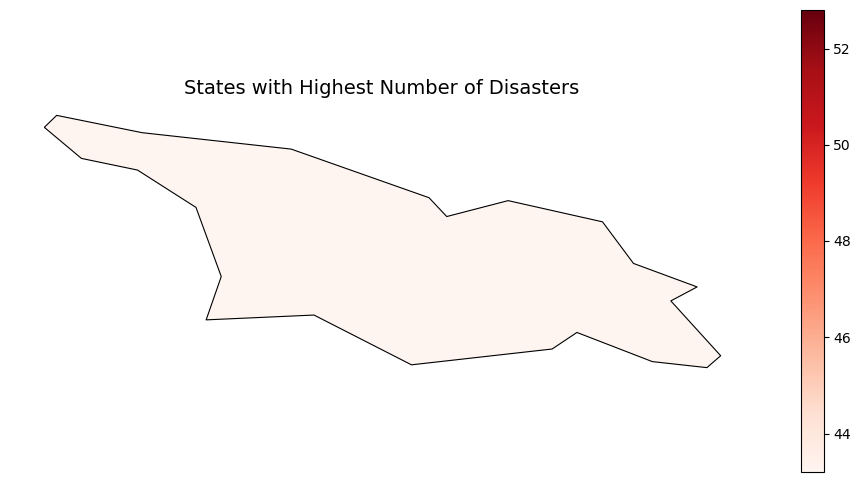

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

df.columns = df.columns.str.lower()
state_disaster_counts = df.groupby('state')['count'].sum().reset_index()

# Load US States shapefile (Download & Extract it first)
usa_map = gpd.read_file("/Users/badrinathsanagavaram/Desktop/DAEN Project/ne_110m_admin_0_countries")  # Update with correct file path

# Merge the disaster data with the geographic map
usa_map = usa_map.merge(state_disaster_counts, left_on="ADMIN", right_on="state", how="left")

# Plot the map with color-coded disaster occurrences
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
usa_map.plot(column='count', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

# Add title and remove axes
ax.set_title("States with Highest Number of Disasters", fontsize=14)
ax.axis("off")

# Show the map
plt.show()

In [26]:
print(usa_map.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL', 'FCLASS_SE',
       'FCLASS_BD', 'FCLASS_UA', 'geometry', 'state', 'count'],
      dtype='object', length=171)


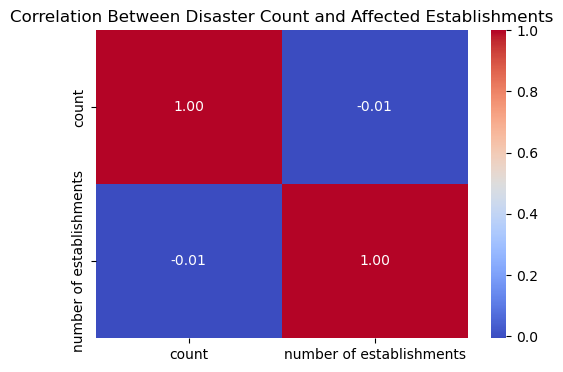

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Ensure relevant columns are numeric
df['count'] = pd.to_numeric(df['count'], errors='coerce')
df['number of establishments'] = pd.to_numeric(df['number of establishments'], errors='coerce')

# Drop NaN values
df_cleaned = df.dropna(subset=['count', 'number of establishments'])

# Compute correlation
correlation_value = df_cleaned[['count', 'number of establishments']].corr()

# Create heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_value, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Disaster Count and Affected Establishments")
plt.show()

In [28]:
import pandas as pd
import ace_tools as tools
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame for better visualization
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display the DataFrame
import ace_tools as tools
tools.display_dataframe_to_user(name="Missing Data Summary", dataframe=missing_data_df)

ModuleNotFoundError: No module named 'ace_tools'

In [29]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [31]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame for better visualization
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display the missing values summary
print(missing_data_df)

                          Missing Values  Percentage (%)
fipsstatecode                          0        0.000000
fipscountycode                         0        0.000000
year                                   0        0.000000
year1                                  0        0.000000
incidenttype                           0        0.000000
count                                  0        0.000000
naics code                             0        0.000000
meaning of naics code                  0        0.000000
number of firms                        0        0.000000
number of establishments             889       38.957055
state                                  0        0.000000
county name                            0        0.000000
